In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

<Axes: >

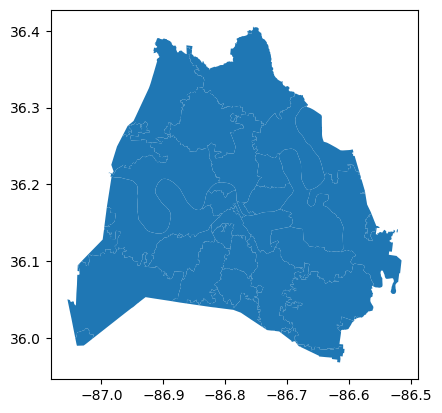

In [45]:
zipcodes.plot()

In [3]:
Heath = pd.read_csv('../data/Heath.csv')

In [4]:
Heath.head()

,Unnamed: 0,Request Number,Date Opened,Request,Description,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Address Street,City
0,0,25270,11/01/17,Trash - Backdoor,"House With The Wheel Chair Ramp, They Share Dr...",37207.0,Red River,3205,2.0,1.727970e+06,686779.478089,3817 Crouch Dr,NaN
1,1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37218.0,Red River,4202,1.0,1.721259e+06,685444.799565,4028 Clarksville Pike,NaN
2,2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37209.0,Red River,4205,20.0,1.707027e+06,659887.471571,6528 Thunderbird Dr,NaN
3,3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed,37207.0,Waste Ind,2206,2.0,1.735692e+06,685027.245923,2603 Old Matthews Rd,NaN
4,4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed The Even Side Of The Road.,37209.0,Red River,4203,20.0,1.710186e+06,664205.101066,604 Croley Dr,NaN


In [5]:
Heath['Zip Code']=Heath['Zip Code']=Heath['Zip Code'].astype(str)

In [12]:
Heath['Zip Code']=Heath['Zip Code'].str[:5]
Heath.head(1)

,Unnamed: 0,Request Number,Date Opened,Request,Description,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Address Street,City
0,0,25270,11/01/17,Trash - Backdoor,"House With The Wheel Chair Ramp, They Share Dr...",37207,Red River,3205,2.0,1.727970e+06,686779.478089,3817 Crouch Dr,NaN


In [7]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [8]:
zipcodes['zipcodes']=zipcodes['Zip Code']=Heath['Zip Code'].astype(str)

In [9]:
Heath.head()

,Unnamed: 0,Request Number,Date Opened,Request,Description,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Address Street,City
0,0,25270,11/01/17,Trash - Backdoor,"House With The Wheel Chair Ramp, They Share Dr...",37207,Red River,3205,2.0,1.727970e+06,686779.478089,3817 Crouch Dr,NaN
1,1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37218,Red River,4202,1.0,1.721259e+06,685444.799565,4028 Clarksville Pike,NaN
2,2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37209,Red River,4205,20.0,1.707027e+06,659887.471571,6528 Thunderbird Dr,NaN
3,3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed,37207,Waste Ind,2206,2.0,1.735692e+06,685027.245923,2603 Old Matthews Rd,NaN
4,4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed The Even Side Of The Road.,37209,Red River,4203,20.0,1.710186e+06,664205.101066,604 Croley Dr,NaN


In [41]:
Heath=Heath.drop(columns=['Unnamed: 0'])

In [42]:
Heath['miss']=(Heath['Description'].str.contains('miss',case = False) |
    Heath['Request'].str.contains('miss', case = False))
Heath.head()


,Request Number,Date Opened,Request,Description,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Address Street,City,miss
0,25270,11/01/17,Trash - Backdoor,"House With The Wheel Chair Ramp, They Share Dr...",37207,Red River,3205,2.0,1.727970e+06,686779.478089,3817 Crouch Dr,NaN,False
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37218,Red River,4202,1.0,1.721259e+06,685444.799565,4028 Clarksville Pike,NaN,True
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37209,Red River,4205,20.0,1.707027e+06,659887.471571,6528 Thunderbird Dr,NaN,True
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed,37207,Waste Ind,2206,2.0,1.735692e+06,685027.245923,2603 Old Matthews Rd,NaN,True
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed The Even Side Of The Road.,37209,Red River,4203,20.0,1.710186e+06,664205.101066,604 Croley Dr,NaN,True


In [43]:
Heath['miss'].value_counts

<bound method IndexOpsMixin.value_counts of 0        False
1         True
2         True
3         True
4         True
         ...  
20221     True
20222     True
20223     True
20224     True
20225     True
Name: miss, Length: 20226, dtype: bool>

In [14]:
Company_mapped=pd.crosstab(Heath['Zip Code'], Heath['Trash Hauler'])
Company_mapped.reset_index()

Trash Hauler,Zip Code,Metro,Red River,Waste Ind
0,37013,2,2191,0
1,37027,0,156,0
2,37086,0,3,0
3,37115,1,1195,0
4,37189,0,58,0
5,37201,18,0,5
6,37203,283,0,76
7,37204,255,351,0
8,37205,111,1318,0
9,37206,626,356,195


In [17]:
trash_missed=Heath.loc[Heath['Request']=='Trash - Curbside/Alley Missed Pickup']
trash_missed.head(2)

,Unnamed: 0,Request Number,Date Opened,Request,Description,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Address Street,City
1,1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37218,Red River,4202,1.0,1.721259e+06,685444.799565,4028 Clarksville Pike,NaN
2,2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash Miss Tuesday.,37209,Red River,4205,20.0,1.707027e+06,659887.471571,6528 Thunderbird Dr,NaN


In [18]:
Heath['Description']=Heath['Description'].str.title()

In [22]:
Description_Missed=Heath.loc[Heath['Description']=='Missed'].head()

In [23]:
Description_Missed.head()

,Unnamed: 0,Request Number,Date Opened,Request,Description,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Incident Address Street,City
3,3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed,37207,Waste Ind,2206,2.0,1.735692e+06,685027.245923,2603 Old Matthews Rd,NaN
100,100,25987,11/03/17,Trash - Curbside/Alley Missed Pickup,Missed,37206,Metro,9506,6.0,1.749558e+06,670298.400857,1609 Lillian St,NaN
110,110,26039,11/03/17,Trash - Curbside/Alley Missed Pickup,Missed,37013,Red River,3502,33.0,1.790884e+06,635609.498651,816 Dresden Ct,NaN
136,136,26283,11/06/17,Trash - Curbside/Alley Missed Pickup,Missed,37013,Red River,4502,33.0,1.784737e+06,629098.451312,3124 Murfreesboro Pike,NaN
137,137,26284,11/06/17,Trash - Curbside/Alley Missed Pickup,Missed,37013,Red River,4502,33.0,1.784737e+06,629098.451312,3124 Murfreesboro Pike,NaN


<Axes: xlabel='Zip Code'>

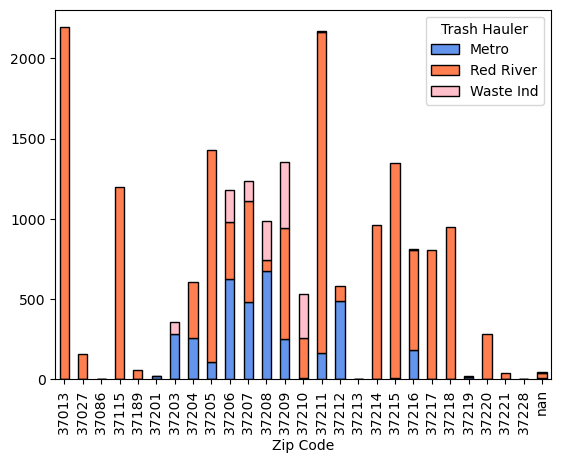

In [24]:
pd.crosstab(Heath['Zip Code'], Heath['Trash Hauler']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars

In [26]:
##trash_missed.groupby('Trash Route')['Missed'].count()

KeyError: 'Column not found: Missed'